In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder

wine_data = pd.read_csv("winequality-red.csv", sep=",")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(wine_data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [65]:
threshold = 4
wine_data = wine_data[(z < threshold).all(axis=1)]
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [66]:
# Create Classification version of target variable
wine_data['goodquality'] = [1 if x >= 7 else 0 for x in wine_data['quality']]
# Separate feature variables and target variable
X = wine_data.drop(['quality','goodquality'], axis = 1)
y = wine_data['goodquality']

In [67]:
wine_data['goodquality'].value_counts()

0    1326
1     211
Name: goodquality, dtype: int64

In [68]:
del X['density']
del X['pH']
del X['free sulfur dioxide']

In [69]:
from imblearn.over_sampling import SMOTE

sample_size = 1700
oversample = SMOTE(sampling_strategy={0: sample_size, 1: sample_size})
X, y = oversample.fit_resample(X, y)

C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1326)
  warnings.warn(
C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1326)
  warnings.warn(


In [70]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=.25, random_state=0)

In [71]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_nn = sc.fit_transform(X_train_nn)
X_test_nn = sc.fit_transform(X_test_nn)

In [72]:
n_classes = 2 # because we only have 6 categories
y_train_cat = tf.keras.utils.to_categorical(y_train_nn, n_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test_nn, n_classes)

In [73]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [74]:
model.compile(loss ="binary_crossentropy", optimizer = 'adam', metrics= ['accuracy'])

In [75]:
history = history = model.fit(X_train_nn, y_train_cat,  batch_size=64, epochs = 100 , validation_data = (X_test_nn, y_test_cat))

Epoch 1/100
40/40 [==============================] - 1s 3ms/step - loss: 0.6886 - accuracy: 0.6267 - val_loss: 0.6409 - val_accuracy: 0.7271
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5904 - accuracy: 0.7710 - val_loss: 0.5413 - val_accuracy: 0.7871
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.8110 - val_loss: 0.4535 - val_accuracy: 0.8165
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8212 - val_loss: 0.4132 - val_accuracy: 0.8318
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8278 - val_loss: 0.3979 - val_accuracy: 0.8376
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8361 - val_loss: 0.3901 - val_accuracy: 0.8412
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8376 - val_loss: 0.3852 - val_accuracy: 0.8435
Epoch 8/100
4

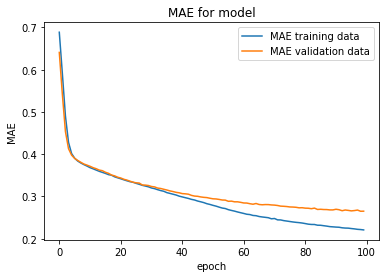

In [76]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

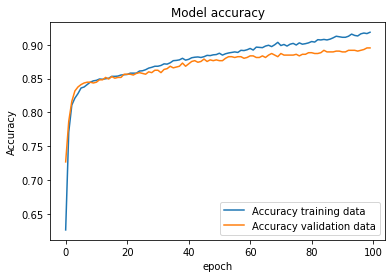

In [77]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()